# PC Data Analysis and Visualization

## Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn.plotting import plot_connectome
from matplotlib.patches import Patch


## Loading PC Data and Community Affiliation

In [9]:

# Base path and community affiliation file
base_path = '/Users/venturelab/Documents/git-papers/nv_rest_network_reboot/Gordon_atlas_results'
community_affiliation_file = '/Users/venturelab/Downloads/Parcels_release/Parcels.xlsx'


community_affiliation_df = pd.read_excel('/Users/venturelab/Downloads/Parcels_release/Parcels.xlsx', usecols=['ParcelID', 'Community', 'Centroid (MNI)'])

coordinates = np.array([list(map(float, coord.split())) for coord in community_affiliation_df['Centroid (MNI)']])




/Applications/anaconda3/envs/neuroventure/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Plotting Functions

In [3]:

def plot_pc_data(session, base_path, community_affiliation_df):
    # Load the PC data
    pc_data = np.loadtxt(f'{base_path}/final_avg_pc_percs/avg_pc_infomap_{session}.txt')

    # Extract the community affiliation information
    community_affiliation = community_affiliation_df['Community'].values

    # Sort the PC data and get the corresponding community affiliations
    sorted_indices = np.argsort(pc_data)[::-1]
    sorted_pc_data = pc_data[sorted_indices]
    sorted_communities = community_affiliation[sorted_indices]

    # Define unique community labels and assign colors
    unique_communities = np.unique(sorted_communities)
    colors = plt.cm.get_cmap('tab20', len(unique_communities))
    
    # Create a color map for the communities
    color_map = {community: colors(i) for i, community in enumerate(unique_communities)}

    # Plot the sorted PC data with colors based on community affiliation
    plt.figure(figsize=(12, 6))
    for community in unique_communities:
        indices = np.where(sorted_communities == community)[0]
        plt.bar(indices, sorted_pc_data[indices], color=color_map[community], label=community)

    plt.xlabel('Nodes')
    plt.ylabel('Participation Coefficient (%)')
    plt.title(f'PC Data for {session}')
    plt.legend(title="Community Affiliation", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    



In [4]:

def plot_pc_glass_brain(session, base_path, community_affiliation_df, coordinates):
    # Load the PC data
    pc_data = np.loadtxt(f'{base_path}/final_avg_pc_percs/avg_pc_infomap_{session}.txt')

    # Extract the community affiliation information
    community_affiliation = community_affiliation_df['Community'].values

    # Define unique community labels and assign colors
    unique_communities = np.unique(community_affiliation)
    colors = plt.cm.get_cmap('tab20', len(unique_communities))

    # Create a color map for the communities
    color_map = {community: colors(i) for i, community in enumerate(unique_communities)}

    # Assign colors and sizes based on PC values and community
    node_colors = np.array([color_map[comm] for comm in community_affiliation])
    node_sizes = (pc_data / np.max(pc_data)) * 100  # Normalize and scale PC values for sizes

    # Plot the glass brain with nodes (spheres)
    plot_connectome(adjacency_matrix=np.zeros((333, 333)), node_coords=coordinates, node_color=node_colors,
                    node_size=node_sizes, title=f'Glass Brain Plot for {session}', display_mode='ortho')

    # Create legend
    legend_elements = [Patch(facecolor=color_map[community], edgecolor='w', label=community) for community in unique_communities]
    
    plt.legend(handles=legend_elements, title="Community Affiliation", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


## Running Analysis

/var/folders/pk/_05twpvj24j0qzvswx59ytfr0000gq/T/ipykernel_51512/2514856972.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_communities))


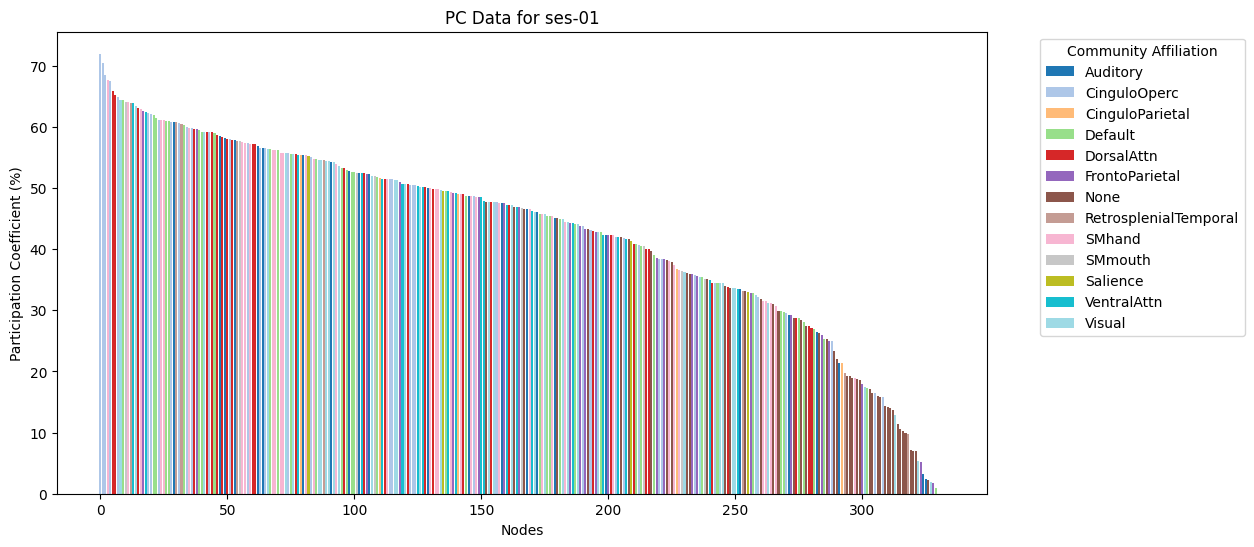

/var/folders/pk/_05twpvj24j0qzvswx59ytfr0000gq/T/ipykernel_51512/2503339257.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_communities))


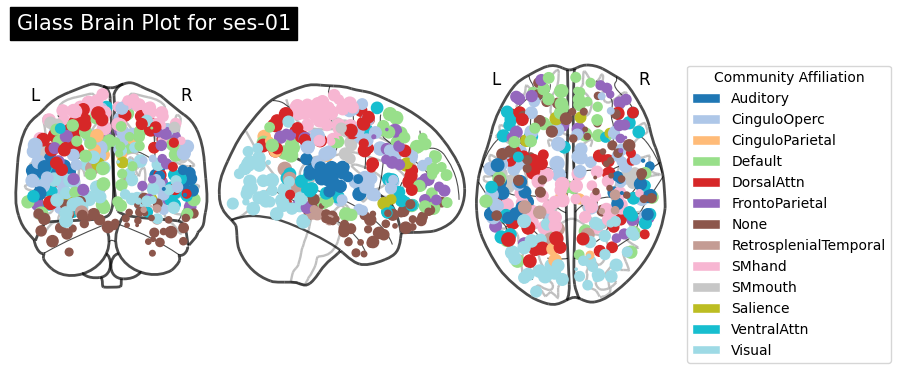

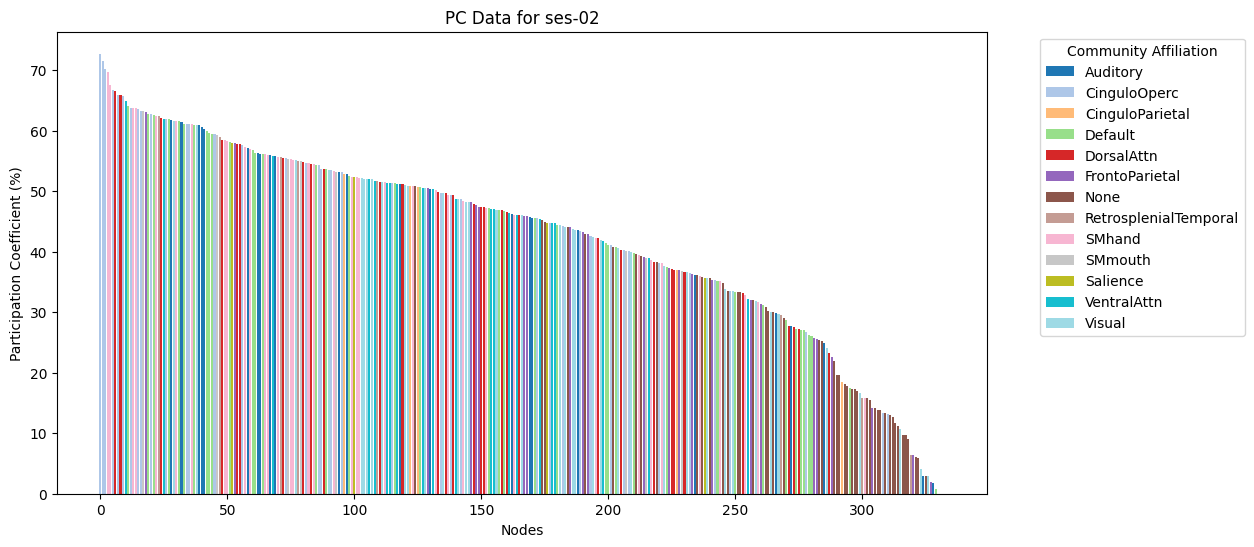

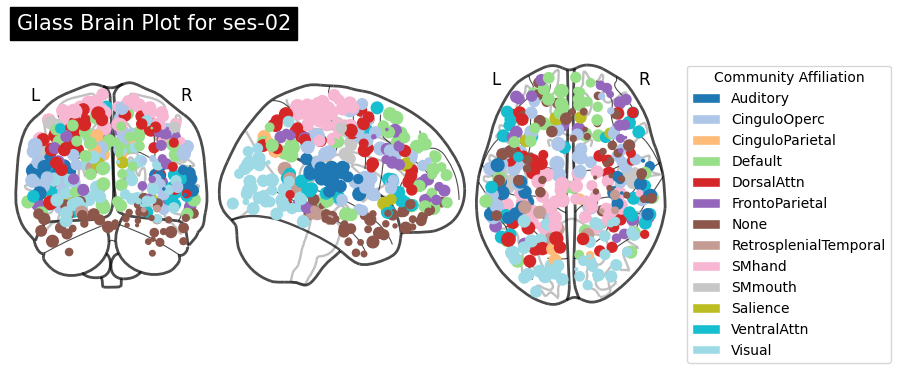

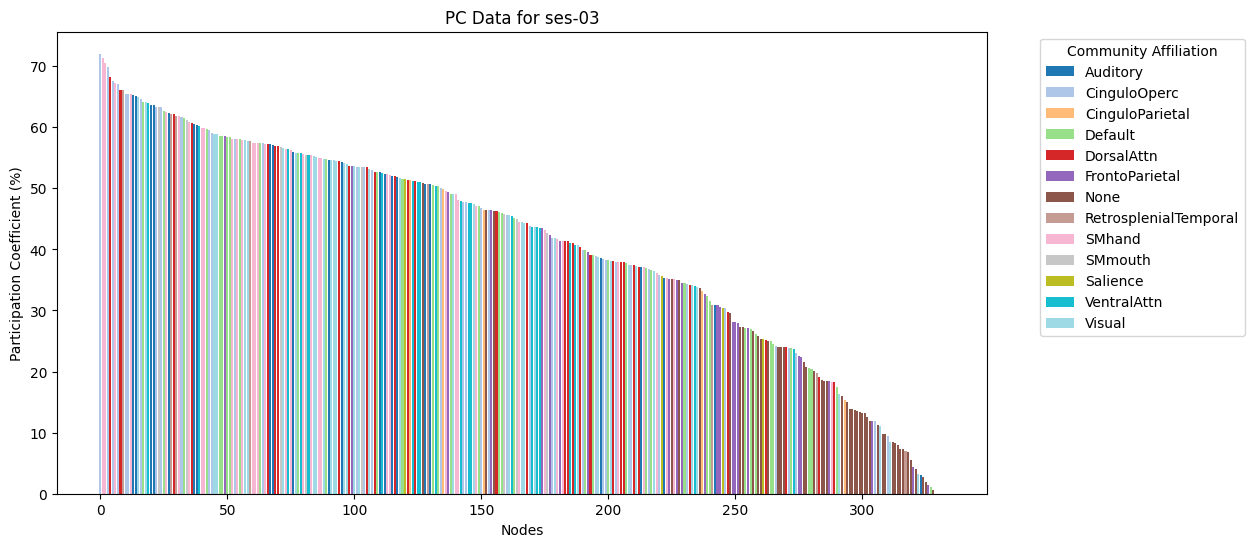

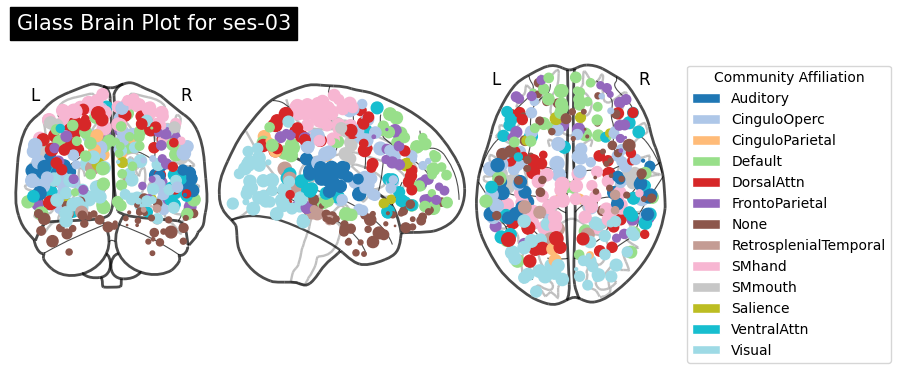

In [10]:

# Plot PC data and glass brain plots for all three sessions
for session in ['ses-01', 'ses-02', 'ses-03']:
    plot_pc_data(session, base_path, community_affiliation_df)
    plot_pc_glass_brain(session, base_path, community_affiliation_df, coordinates)


/Applications/anaconda3/envs/neuroventure/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/var/folders/pk/_05twpvj24j0qzvswx59ytfr0000gq/T/ipykernel_51512/3387312040.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_communities))


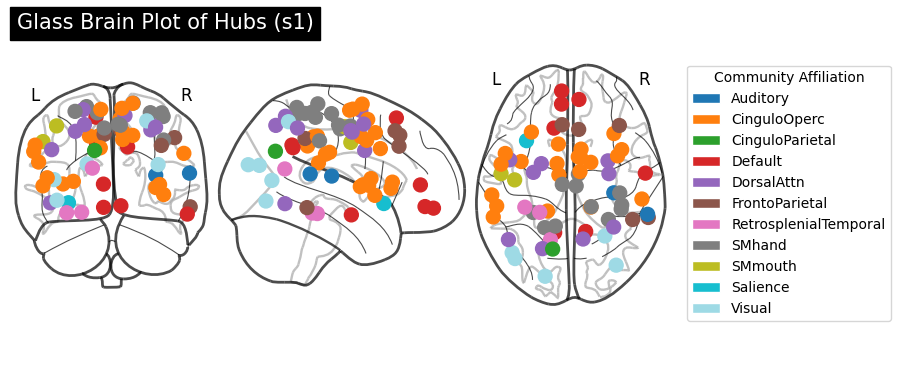

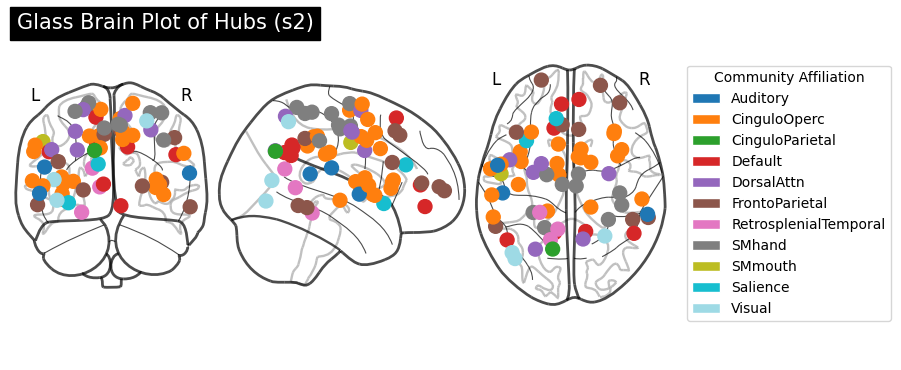

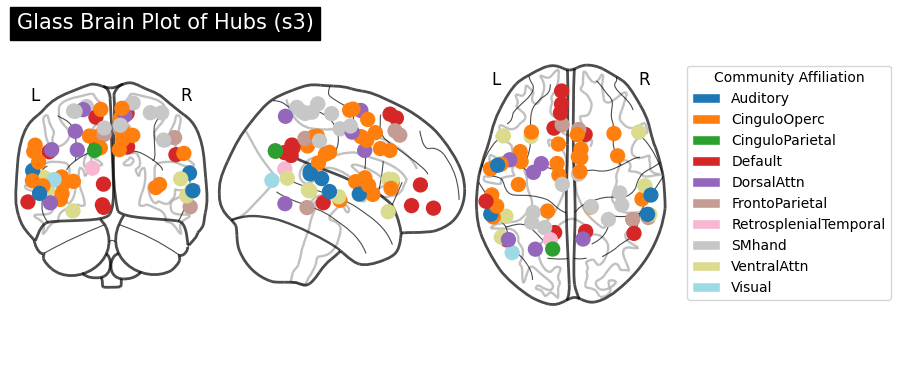

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn.plotting import plot_connectome
from matplotlib.patches import Patch

# Load the community affiliation and coordinates information
community_affiliation_df = pd.read_excel('/Users/venturelab/Downloads/Parcels_release/Parcels.xlsx', usecols=['ParcelID', 'Community', 'Centroid (MNI)'])

# Parse the coordinates from the 'Centroid (MNI)' column
coordinates = np.array([list(map(float, coord.split())) for coord in community_affiliation_df['Centroid (MNI)']])

# Function to plot the hubs on a glass brain for each session
def plot_hubs_glass_brain(session, base_path, community_affiliation_df, coordinates):
    # Load the hub indices data for the given session
    hub_indices = np.loadtxt(f'{base_path}/final_hub_indices/avg_correlation_{session}_HUB_INDICES.txt').astype(int)

    # Get the coordinates and community affiliations for the hubs
    hub_coordinates = coordinates[hub_indices - 1]  # Adjust for 0-based indexing
    hub_communities = community_affiliation_df['Community'].values[hub_indices - 1]

    # Define unique community labels and assign colors
    unique_communities = np.unique(hub_communities)
    colors = plt.cm.get_cmap('tab20', len(unique_communities))

    # Create a color map for the communities
    color_map = {community: colors(i) for i, community in enumerate(unique_communities)}

    # Assign colors to hubs based on their community
    node_colors = np.array([color_map[comm] for comm in hub_communities])
    node_sizes = np.full(len(hub_indices), 100)  # Fixed size for all hubs

    # Plot the glass brain with the hubs
    plot_connectome(adjacency_matrix=np.zeros((len(hub_indices), len(hub_indices))), node_coords=hub_coordinates,
                    node_color=node_colors, node_size=node_sizes, title=f'Glass Brain Plot of Hubs ({session})', display_mode='ortho')

    # Create legend
    legend_elements = [Patch(facecolor=color_map[community], edgecolor='w', label=community) for community in unique_communities]
    
    plt.legend(handles=legend_elements, title="Community Affiliation", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Base path and community affiliation file
base_path = '/Users/venturelab/Documents/git-papers/nv_rest_network_reboot/Gordon_atlas_results/average_resting_state'

# Plot hub data on a glass brain for all three sessions
for session in ['s1', 's2', 's3']:
    plot_hubs_glass_brain(session, base_path, community_affiliation_df, coordinates)